## Santander customer satisfaction prediction
*  Evaluation  - area under the ROC curve

### Google Drive mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
gFlag = True
if gFlag:
  TARGET_DIR = '/content/drive/MyDrive/Colab Notebooks/datasets/santander-customer-satisfaction/'
else:
  pass

### Package import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 

### Data Preprocessing

In [4]:
cust_df = pd.read_csv(TARGET_DIR+"train_santander.csv")
display("dataset shape : ", cust_df.shape)  # (76020, 371)
cust_df.head(n = 3)

'dataset shape : '

(76020, 371)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.0,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


이진분류의 값인 경우는 TARGET값의 분포도를 알 필요가 있다.(불균형 데이터인 경우의 처리가 필요)
- `1` - unsatisfaction, `0` - satisfaction

In [ ]:
display(cust_df['TARGET'].value_counts())

# Satisfaction
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64

unsatisfied 비율은 0.04


In [ ]:
# Technical Statistics
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

In [ ]:
# found out the frequency of var3
display(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [5]:
# var3값을 가장 많은 `2`값으로 대체하고 불필요한 ID컬럼 삭제
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True, errors='ignore')

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))
print('labels data shape:{0}'.format(y_labels.shape))

피처 데이터 shape:(76020, 369)
labels data shape:(76020,)


### Split train and test datasets

In [6]:
from sklearn.model_selection import train_test_split

# 불균형한 데이터셋인 경우에 학습,테스트세트 비율이 비슷하게 들어가야 함.
# stratify=y_labels
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()

print("train dataset shape : {0}, test dataset shape: {1}".format(X_train.shape, X_test.shape))
print("train datasets label frequency ratio ", y_train.value_counts() / train_cnt)
print("\n test datasets label frequency ratio ", y_test.value_counts() / test_cnt)

train dataset shape : (60816, 369), test dataset shape: (15204, 369)
train datasets label frequency ratio  0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 test datasets label frequency ratio  0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### Train using XGBoost and Evaluation 

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# n_estimators는 500
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# eval_metric - auc
# early_stopping_rounds - 100
evals = [(X_train, y_train), (X_test, y_test)]
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals)

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
auc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC Score  : {0:.4f}".format(auc_score))  # ROC AUC Score  : 0.8419

ROC AUC Score  : 0.8419


### GridSearchCV - hyper parameter tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5, 7],
    'colsample_bytree': [0.5, 0.75],
    'min_child_weight': [1, 3]
}
# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

# cv를 지정하지 않음(수행속도 향상위해)
# GridSearchCV를 이용해 하이퍼 파라미터 튜닝을 하더라도 성능이 대폭 개선되는 것이 아님을 유의 - 피처 엔지니어링이 더 나을수도 있음
# 하이퍼 파라미터 튜닝은 데이터베이스 성능개선의 파라미터 튜닝과 유사하다고 보면 됨.
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = evals)

display("the optimal parameters : ", gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC  = {0:.4f}".format(xgb_roc_score))

[0]	validation_0-auc:0.716371	validation_1-auc:0.721224
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.808233	validation_1-auc:0.811497
[2]	validation_0-auc:0.804883	validation_1-auc:0.804536
[3]	validation_0-auc:0.815261	validation_1-auc:0.81637
[4]	validation_0-auc:0.825247	validation_1-auc:0.824507
[5]	validation_0-auc:0.819668	validation_1-auc:0.820074
[6]	validation_0-auc:0.818989	validation_1-auc:0.819519
[7]	validation_0-auc:0.824907	validation_1-auc:0.825344
[8]	validation_0-auc:0.828985	validation_1-auc:0.828536
[9]	validation_0-auc:0.827021	validation_1-auc:0.825688
[10]	validation_0-auc:0.83165	validation_1-auc:0.828585
[11]	validation_0-auc:0.834058	validation_1-auc:0.831318
[12]	validation_0-auc:0.836334	validation_1-auc:0.832347
[13]	validation_0-auc:0.835441	validation_1-auc:0.831432
[14]	validation_0-auc:0.834861	validation_1-auc:0.830882


'the optimal parameters : '

{'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 1}

ROC AUC  = 0.8460


#### Hyper parameter Tuning 2
* `n_estimators = 1000`
* `learning_rate=0.02`
* `reg_alpha=0.03`
* `max_depth=7`


In [ ]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
# 컬럼갯수가 많음로 과적합 가능성을 가정하고 과적합을 위한 규제 파라미터 설정
evals = [(X_train, y_train), (X_test, y_test)]
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=evals)

print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

#### Hyper parameter Tuning 3
* `max_depth = 5`

In [ ]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5, \
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

evals = [(X_train, y_train), (X_test, y_test)]

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=evals)
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.817284	validation_1-auc:0.811534
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.820302	validation_1-auc:0.812178
[2]	validation_0-auc:0.823363	validation_1-auc:0.816027
[3]	validation_0-auc:0.825007	validation_1-auc:0.81705
[4]	validation_0-auc:0.825243	validation_1-auc:0.817264
[5]	validation_0-auc:0.827563	validation_1-auc:0.819988
[6]	validation_0-auc:0.827812	validation_1-auc:0.819542
[7]	validation_0-auc:0.827855	validation_1-auc:0.819216
[8]	validation_0-auc:0.829221	validation_1-auc:0.819799
[9]	validation_0-auc:0.829078	validation_1-auc:0.818898
[10]	validation_0-auc:0.830731	validation_1-auc:0.820967
[11]	validation_0-auc:0.828293	validation_1-auc:0.819437
[12]	validation_0-auc:0.829608	validation_1-auc:0.821204
[13]	validation_0-auc:0.830487	validation_1-auc:0.821121
[14]	validation_0-auc:0.834894	validation_1-auc:0.82706

#### plot_importance
* `F score`의 의미 - 해당 피처가 얼마나 많이 영향도가 있는지를 의미.

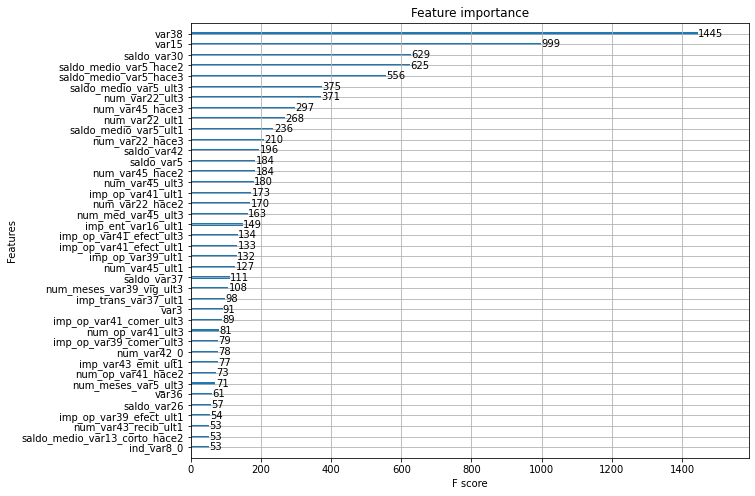

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))

# max_num_features - the nbr of feature limitation
# height - bar width
plot_importance(xgb_clf, ax=ax , max_num_features=40,height=0.2)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [12]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# Classifiers object 
lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_train, y_train), (X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1],average='macro')

display('ROC AUC: {0:.4f}'.format(lgbm_roc_score))  # ROC AUC: 0.8396

[1]	training's auc: 0.823612	training's binary_logloss: 0.156016	valid_1's auc: 0.817384	valid_1's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.827721	training's binary_logloss: 0.150537	valid_1's auc: 0.81863	valid_1's binary_logloss: 0.16
[3]	training's auc: 0.838174	training's binary_logloss: 0.146582	valid_1's auc: 0.827411	valid_1's binary_logloss: 0.156287
[4]	training's auc: 0.843175	training's binary_logloss: 0.143436	valid_1's auc: 0.832175	valid_1's binary_logloss: 0.153416
[5]	training's auc: 0.845936	training's binary_logloss: 0.14091	valid_1's auc: 0.83481	valid_1's binary_logloss: 0.151206
[6]	training's auc: 0.847111	training's binary_logloss: 0.138833	valid_1's auc: 0.834721	valid_1's binary_logloss: 0.149303
[7]	training's auc: 0.850065	training's binary_logloss: 0.137055	valid_1's auc: 0.83659	valid_1's binary_logloss: 0.147804
[8]	training's auc: 0.852458	training's binary_logloss: 0.135438	valid_1's au

'ROC AUC: 0.8396'

#### Hyper parameter Tuning for GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트 수행속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

# Hyper parameter설정
params = {
    'num_leaves':[32, 64],
    'max_depth':[128, 160],
    'min_child_samples':[60, 100],
    'subsample':[0.8, 1]
}

# 하이퍼 파라미터 테스트 수행속도를 향상시키기 위해 교차검증(cross-validation) 파라미터 지정안함
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set= evals)

display("The best hyper parameter : ", gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
display('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.82965	valid_0's binary_logloss: 0.15092	valid_1's auc: 0.824865	valid_1's binary_logloss: 0.15978
[3]	valid_0's auc: 0.835112	valid_0's binary_logloss: 0.147151	valid_1's auc: 0.826157	valid_1's binary_logloss: 0.156174
[4]	valid_0's auc: 0.839678	valid_0's binary_logloss: 0.14422	valid_1's auc: 0.830489	valid_1's binary_logloss: 0.153395
[5]	valid_0's auc: 0.842477	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.832915	valid_1's binary_logloss: 0.151083
[6]	valid_0's auc: 0.845763	valid_0's binary_logloss: 0.139668	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149317
[7]	valid_0's auc: 0.846352	valid_0's binary_logloss: 0.137997	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.14773
[8]	valid_0's auc: 0.849153	valid_0's binary_logloss: 0.13653	valid_1's auc: 0.837152	vali

'The best hyper parameter : '

{'max_depth': 128,
 'min_child_samples': 100,
 'num_leaves': 64,
 'subsample': 0.8}

'ROC AUC: 0.8423'

#### Reprocessing with the best hyper parameter

The best hyper parameter : 
{'max_depth': 128,
 'min_child_samples': 100,
 'num_leaves': 64,
 'subsample': 0.8}

 ROC AUC: 0.8423

In [21]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, sumbsample=0.8, min_child_samples=100,max_depth=128)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, eval_metric='auc', eval_set=evals, early_stopping_rounds=100, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC Score : {0:.4f}".format(lgbm_roc_score))  # ROC AUC Score : 0.8423

[1]	valid_0's auc: 0.821775	valid_0's binary_logloss: 0.164676
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.829264	valid_0's binary_logloss: 0.159437
[3]	valid_0's auc: 0.83245	valid_0's binary_logloss: 0.155746
[4]	valid_0's auc: 0.836758	valid_0's binary_logloss: 0.152668
[5]	valid_0's auc: 0.837959	valid_0's binary_logloss: 0.150325
[6]	valid_0's auc: 0.839878	valid_0's binary_logloss: 0.148379
[7]	valid_0's auc: 0.840649	valid_0's binary_logloss: 0.146892
[8]	valid_0's auc: 0.840889	valid_0's binary_logloss: 0.145589
[9]	valid_0's auc: 0.840982	valid_0's binary_logloss: 0.144614
[10]	valid_0's auc: 0.841093	valid_0's binary_logloss: 0.143703
[11]	valid_0's auc: 0.841325	valid_0's binary_logloss: 0.142968
[12]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.142326
[13]	valid_0's auc: 0.841979	valid_0's binary_logloss: 0.141731
[14]	valid_0's auc: 0.842271	valid_0's binary_logloss: 0.141213
[15]	valid_0's auc: 0.841797	valid_0's binary_loglo